<a href="https://colab.research.google.com/github/billiahkerubo1/Data-Science-Portfolio/blob/main/YellowTaxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YELLOW TAXI ANALYSIS**

# Business Understanding

New York City (NYC) is one of the major metropolis cities globally with  public transportation system that is  among the busiest and most intricate. In the hustle and bustle of NYC, taxis play a key role in providing fast and bendable transportation services, filling gaps that may not be possible using the subway and bus systems.

Objectives:
1. Understanding taxi fleet distribution based on customer demand patterns to make it more efficient in terms of operational costs.


2. Understanding and meeting customer preferences and needs to increase customer loyalty and satisfaction

## Libraries

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score

## Load data

In [ ]:
# Load data
df = pd.read_csv('/content/2017_Yellow_Taxi_Trip_Data.csv')
# Preview the first five records
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,10/08/2017 08:01:36 PM,10/08/2017 08:05:13 PM,1,0.56,1.0,N,79.0,79.0,1.0,4.5,0.0,0.5,1.00,0.0,0.3,6.30
1,1,10/08/2017 07:08:35 PM,10/08/2017 07:26:19 PM,1,3.40,1.0,N,140.0,238.0,1.0,14.5,0.0,0.5,3.05,0.0,0.3,18.35
2,1,10/08/2017 07:33:48 PM,10/08/2017 07:39:51 PM,4,1.20,1.0,N,142.0,230.0,2.0,6.0,0.0,0.5,0.00,0.0,0.3,6.80
3,1,10/08/2017 07:43:00 PM,10/08/2017 07:44:09 PM,1,0.30,1.0,N,48.0,163.0,2.0,3.0,0.0,0.5,0.00,0.0,0.3,3.80
4,1,10/08/2017 07:47:53 PM,10/08/2017 07:54:49 PM,1,1.00,1.0,N,142.0,237.0,1.0,6.5,0.0,0.5,1.00,0.0,0.3,8.30


## Data Exploration

In [ ]:
# Check for data summary such as the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33680 entries, 0 to 33679
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               33680 non-null  int64  
 1   tpep_pickup_datetime   33680 non-null  object 
 2   tpep_dropoff_datetime  33680 non-null  object 
 3   passenger_count        33680 non-null  int64  
 4   trip_distance          33680 non-null  float64
 5   RatecodeID             33679 non-null  float64
 6   store_and_fwd_flag     33679 non-null  object 
 7   PULocationID           33679 non-null  float64
 8   DOLocationID           33679 non-null  float64
 9   payment_type           33679 non-null  float64
 10  fare_amount            33679 non-null  float64
 11  extra                  33679 non-null  float64
 12  mta_tax                33679 non-null  float64
 13  tip_amount             33679 non-null  float64
 14  tolls_amount           33679 non-null  float64
 15  im

From the data summary,  there are 33680 rows and 17 columns.

Some features have missing values that need to be handled and datatype to be changed to the appropriate one, especially the time variables


In [ ]:
# Checking for the missing values
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               1
store_and_fwd_flag       1
PULocationID             1
DOLocationID             1
payment_type             1
fare_amount              1
extra                    1
mta_tax                  1
tip_amount               1
tolls_amount             1
improvement_surcharge    1
total_amount             1
dtype: int64

The missing values are relatively small in number compared to the total dataset and will be dropped because dropping them will not significantly  bias the analysis.


In [ ]:
# Dropping missing values

df.dropna(subset=['RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
                  'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                  'tolls_amount', 'improvement_surcharge', 'total_amount'], inplace=True)


In [ ]:
# Checking whether the missing valus have been dropped
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

There are no missing values

In [ ]:
# Check for duplicates
df.duplicated().sum()

0

There are no duplicates in the data.

In [ ]:
# Dropping ID variables
df.drop(columns=['PULocationID', 'VendorID', 'DOLocationID'], inplace=True)


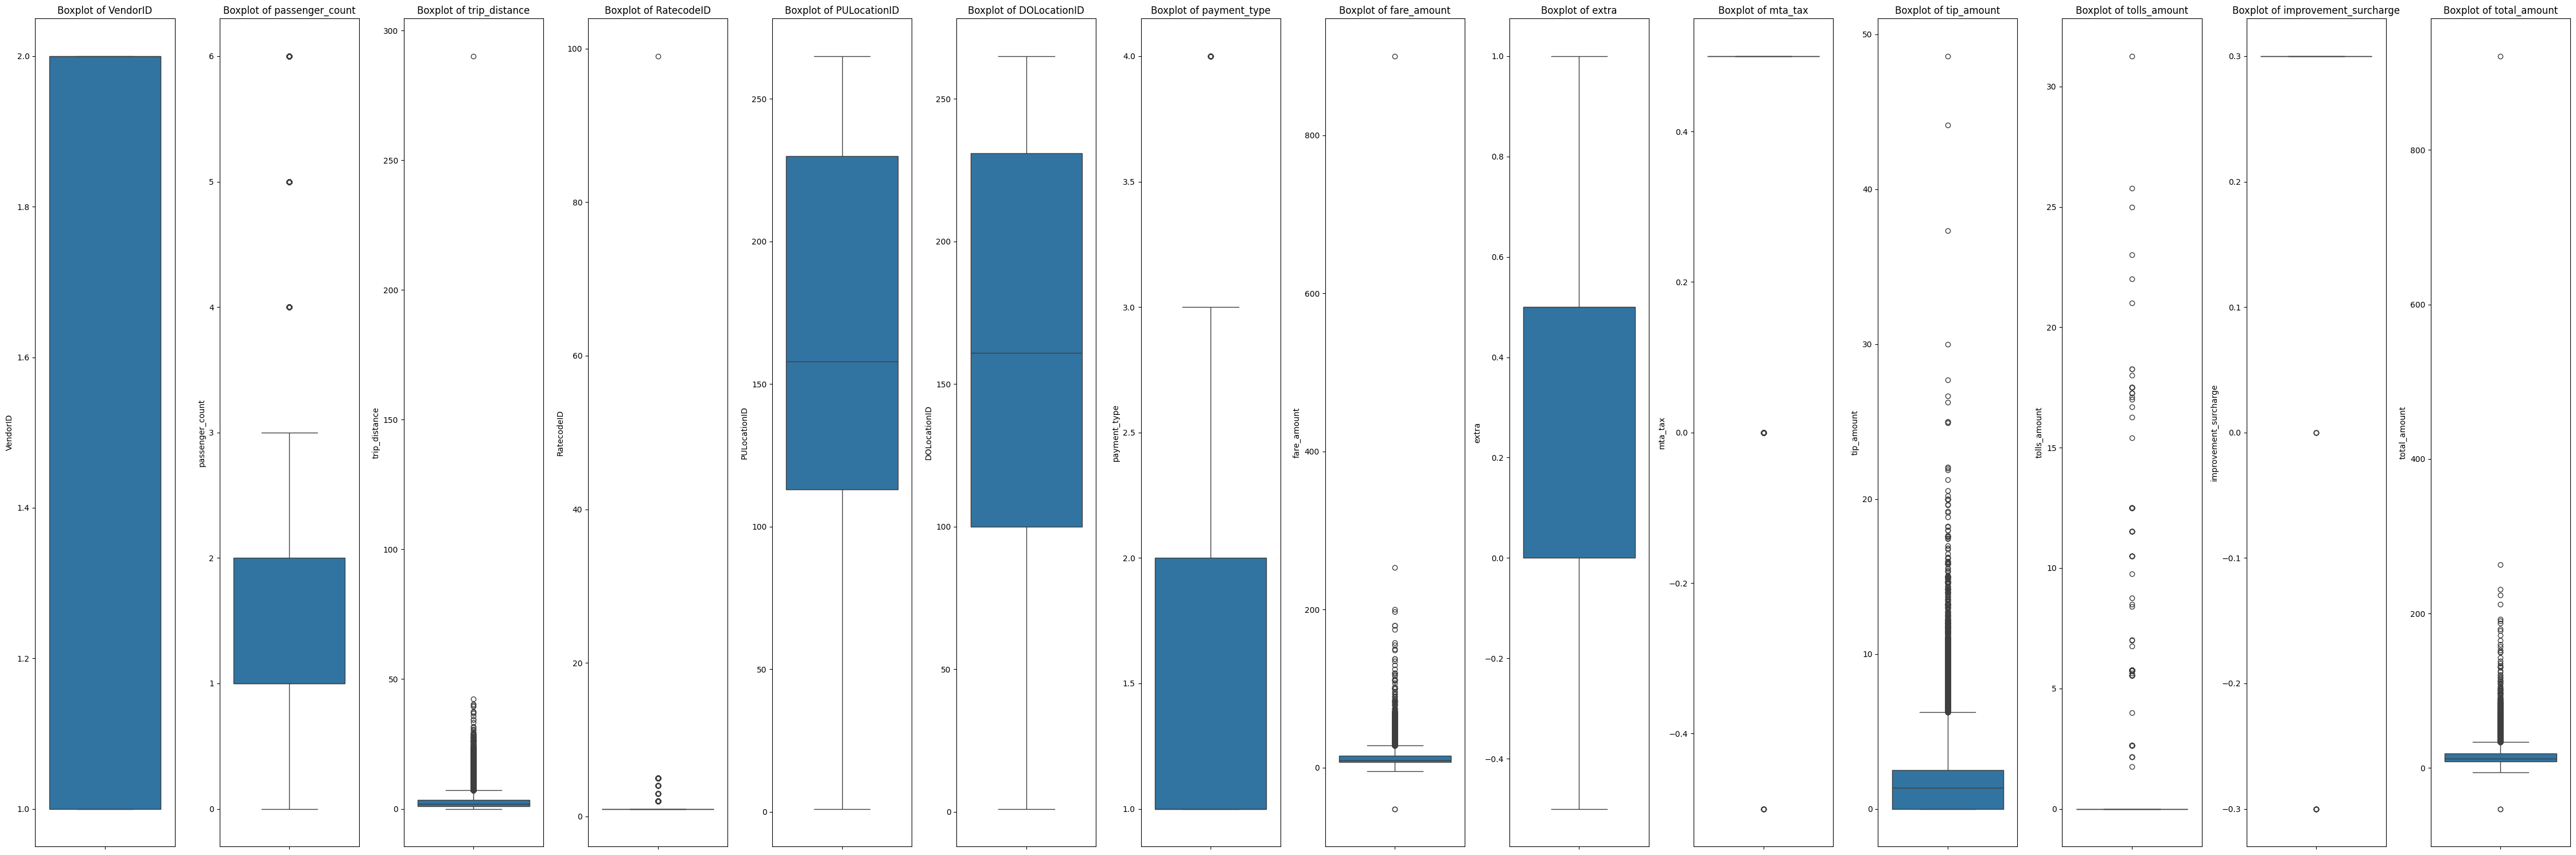

In [ ]:
# Check for outliers
# Select columns with numerical dtype
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Create boxplots for each numerical column
plt.figure(figsize=(45, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [ ]:
# Changing the time features datatype to the datetime datatype
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [ ]:
# Creating new features to get more data insight
df['month'] = df.tpep_pickup_datetime.dt.month
df['weekday'] = df.tpep_pickup_datetime.dt.day_name
df['weekday_num'] = df.tpep_pickup_datetime.dt.weekday
df['pickup_hour'] = df.tpep_pickup_datetime.dt.hour
# Calculate trip duration in hours
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 3600


# Data Analysis

Data analysis will help identify the trends and patterns in the data to help in decision-making. Data analysis steps to be taken include univariate, bivariate and multivariate analysis using several techniques to understanding relationships and patterns in the data.

## Univariate Analysis

Statistics for numerical variable: VendorID
Mean: 1.568692657145402
Median: 2.0
Minimum: 1
Maximum: 2



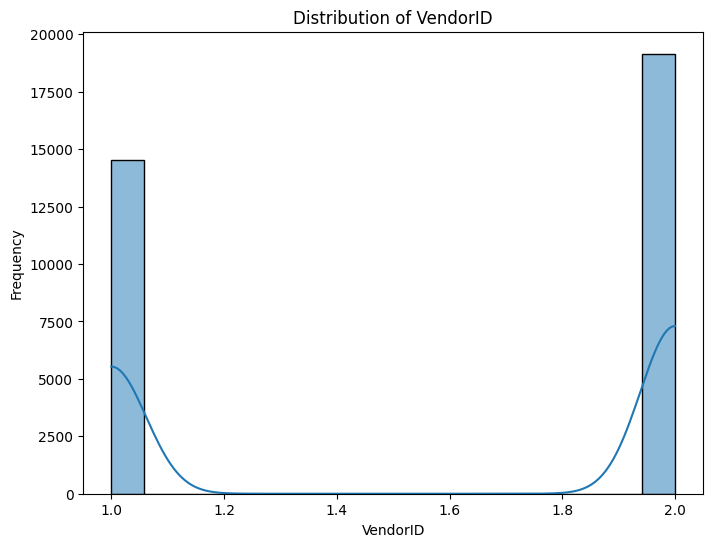

Statistics for numerical variable: tpep_pickup_datetime
Mean: 2017-10-08 20:18:43.909558016
Median: 2017-10-08 20:15:54
Minimum: 2017-10-08 05:25:10
Maximum: 2017-10-08 23:50:39



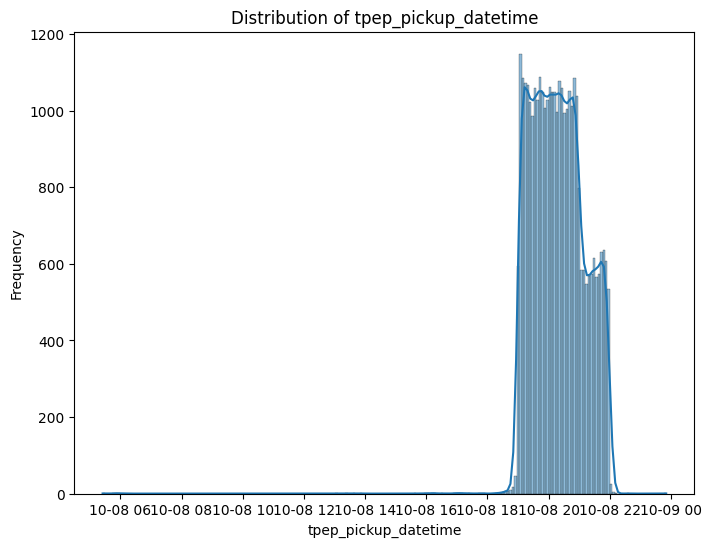

Statistics for numerical variable: tpep_dropoff_datetime
Mean: 2017-10-08 20:36:07.474123520
Median: 2017-10-08 20:30:42
Minimum: 2017-10-08 05:26:00
Maximum: 2017-10-09 21:39:57



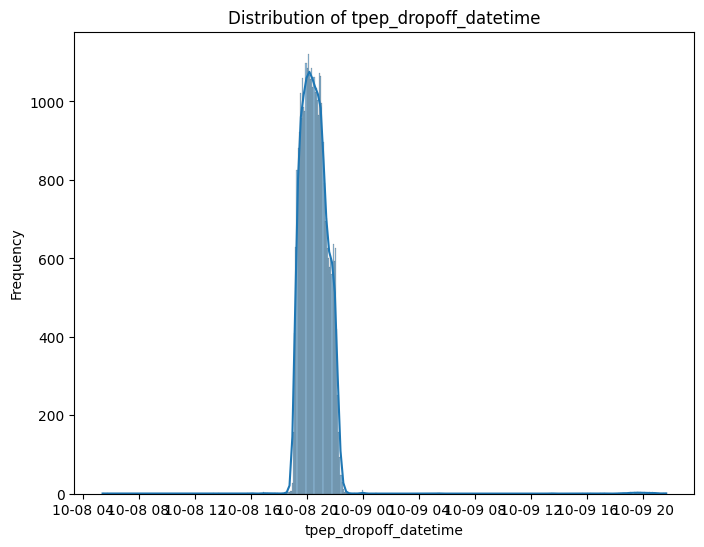

Statistics for numerical variable: passenger_count
Mean: 1.688292407731821
Median: 1.0
Minimum: 0
Maximum: 6



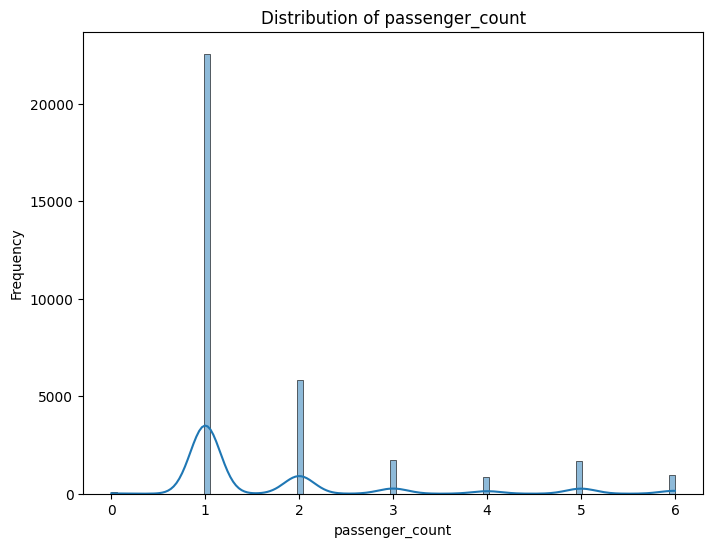

Statistics for numerical variable: trip_distance
Mean: 3.3959924582083794
Median: 1.81
Minimum: 0.0
Maximum: 290.1



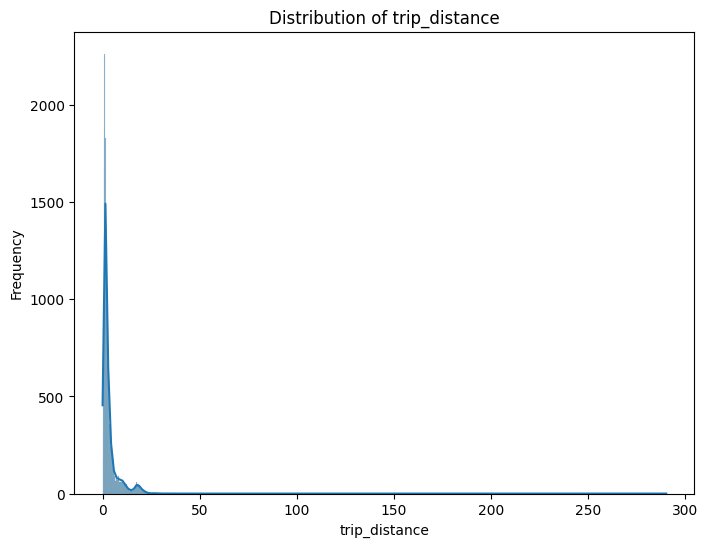

Statistics for numerical variable: RatecodeID
Mean: 1.0560586715757594
Median: 1.0
Minimum: 1.0
Maximum: 99.0



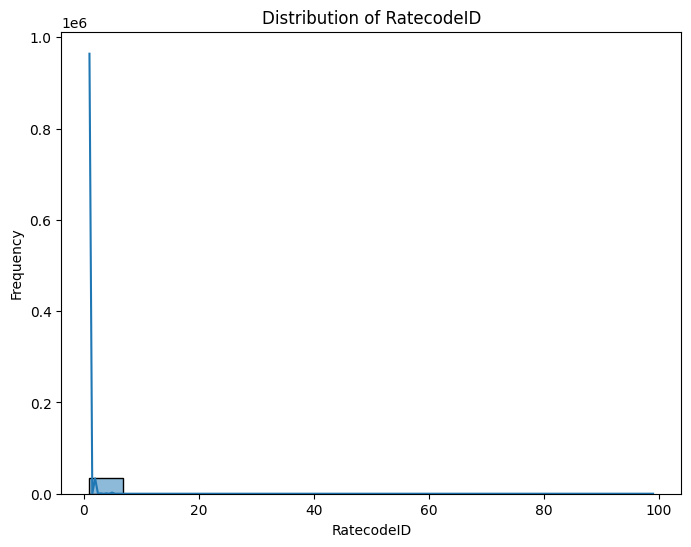

Distribution of categorical variable: store_and_fwd_flag
store_and_fwd_flag
N    33575
Y      104
Name: count, dtype: int64

Statistics for numerical variable: PULocationID
Mean: 157.8245197303958
Median: 158.0
Minimum: 1.0
Maximum: 265.0



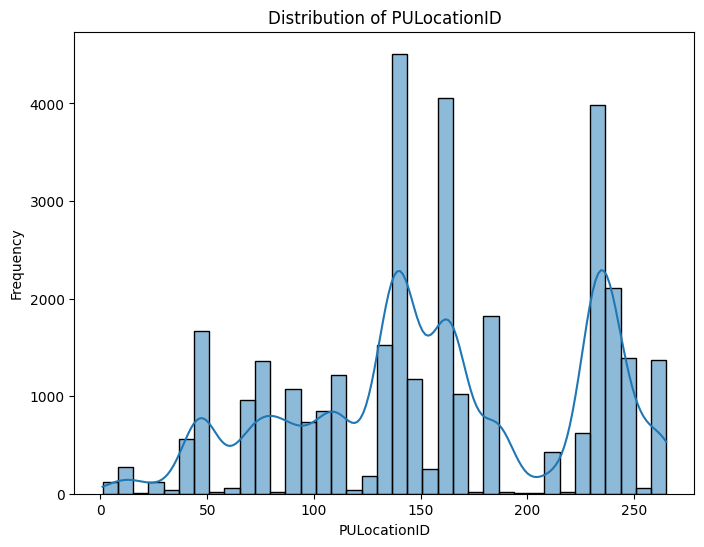

Statistics for numerical variable: DOLocationID
Mean: 157.2482852816295
Median: 161.0
Minimum: 1.0
Maximum: 265.0



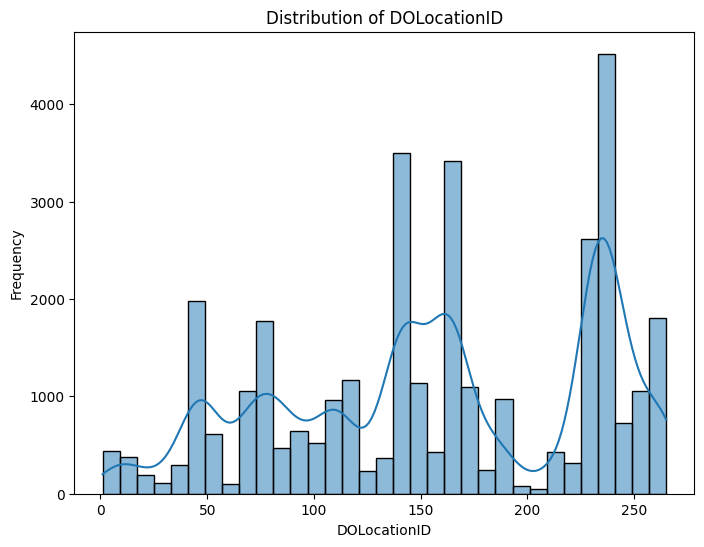

Statistics for numerical variable: payment_type
Mean: 1.349238397814662
Median: 1.0
Minimum: 1.0
Maximum: 4.0



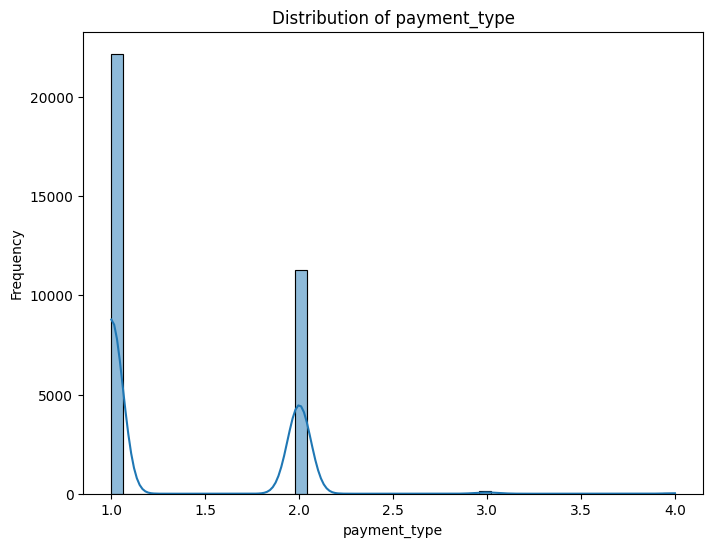

Statistics for numerical variable: fare_amount
Mean: 13.963765551233708
Median: 9.5
Minimum: -52.0
Maximum: 900.0



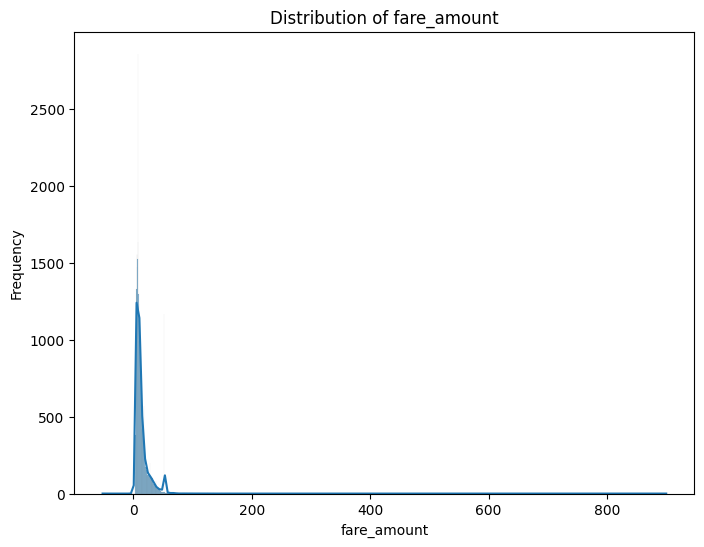

Statistics for numerical variable: extra
Mean: 0.2982570741411562
Median: 0.5
Minimum: -0.5
Maximum: 1.0



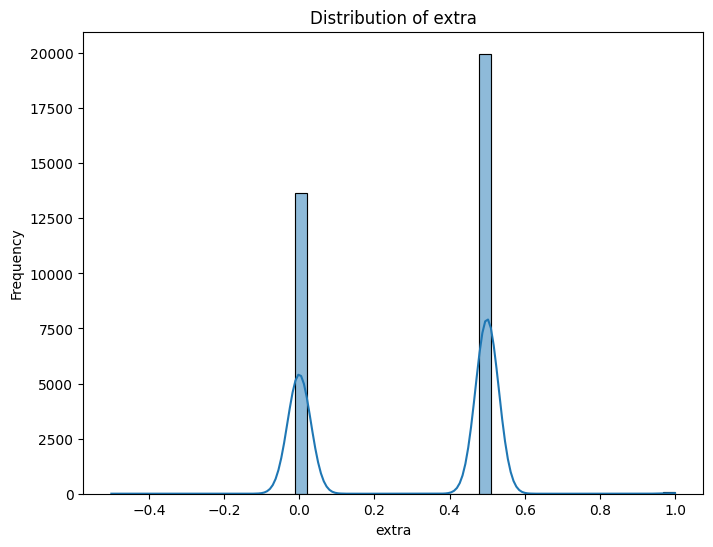

Statistics for numerical variable: mta_tax
Mean: 0.49809970604827936
Median: 0.5
Minimum: -0.5
Maximum: 0.5



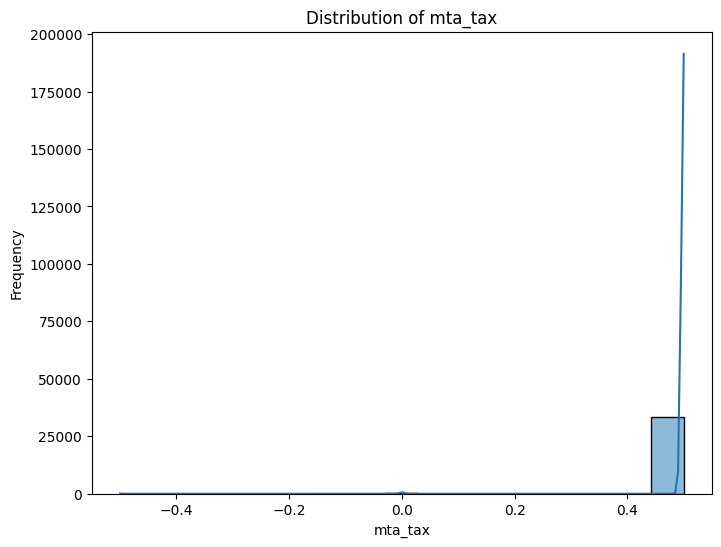

Statistics for numerical variable: tip_amount
Mean: 1.9320196561655631
Median: 1.35
Minimum: 0.0
Maximum: 48.58



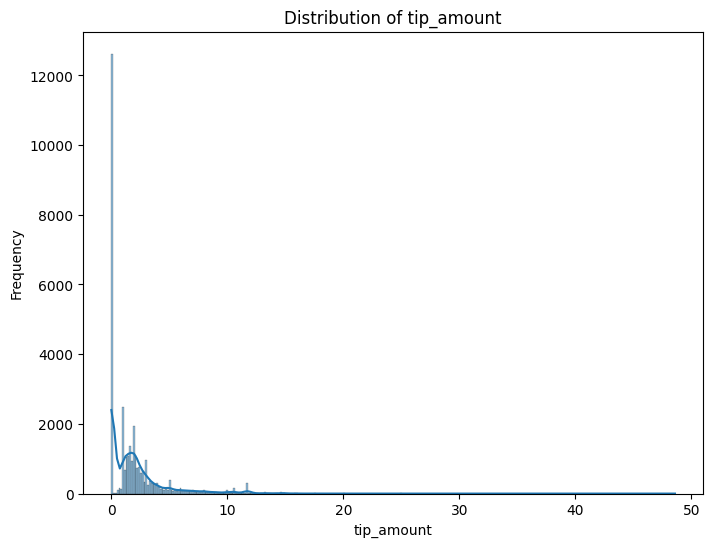

Statistics for numerical variable: tolls_amount
Mean: 0.37606104694319903
Median: 0.0
Minimum: 0.0
Maximum: 31.26



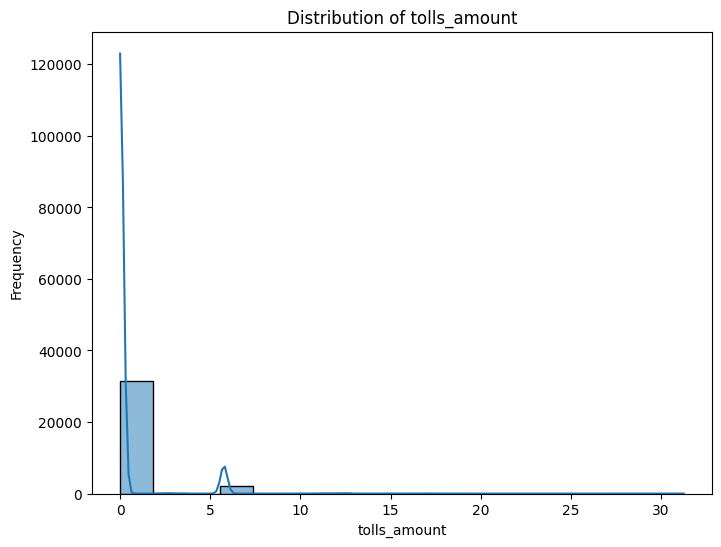

Statistics for numerical variable: improvement_surcharge
Mean: 0.2997862169304314
Median: 0.3
Minimum: -0.3
Maximum: 0.3



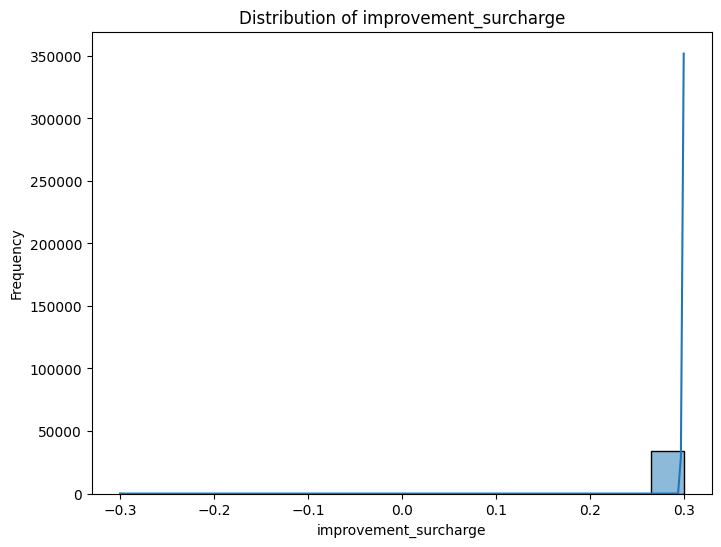

Statistics for numerical variable: total_amount
Mean: 17.3689156447638
Median: 12.3
Minimum: -52.8
Maximum: 921.31



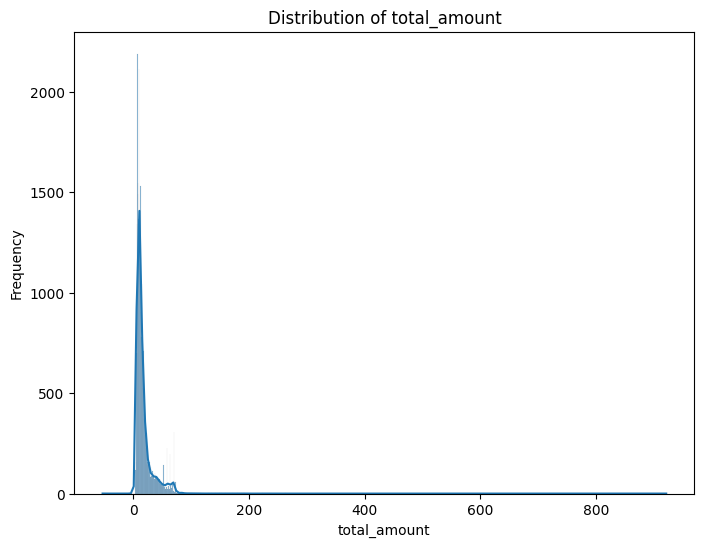

Statistics for numerical variable: month
Mean: 10.0
Median: 10.0
Minimum: 10
Maximum: 10



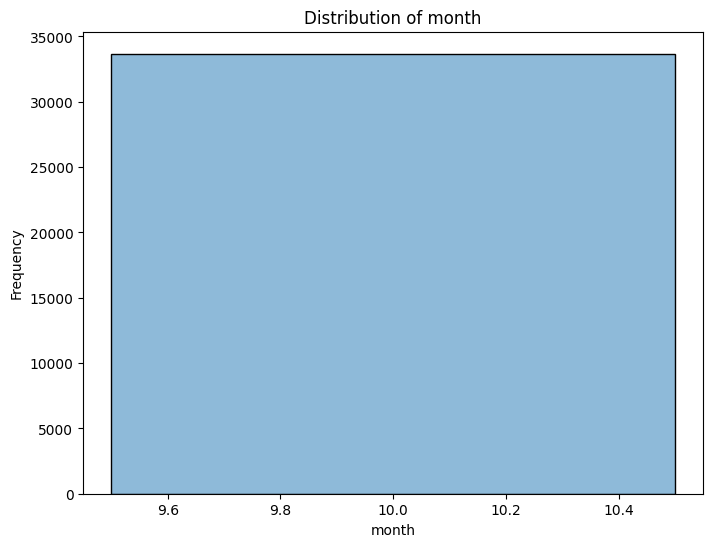

Distribution of categorical variable: weekday
weekday
<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x7933c308de40>>    33679
Name: count, dtype: int64

Statistics for numerical variable: weekday_num
Mean: 6.0
Median: 6.0
Minimum: 6
Maximum: 6



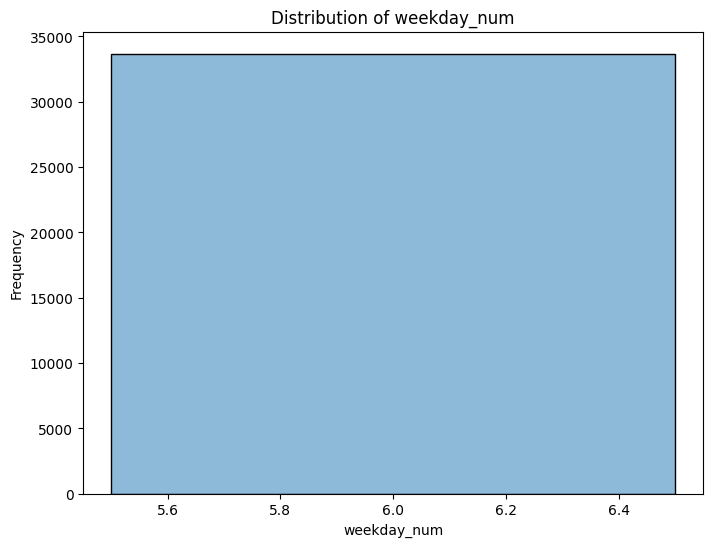

Statistics for numerical variable: pickup_hour
Mean: 19.812731969476527
Median: 20.0
Minimum: 5
Maximum: 23



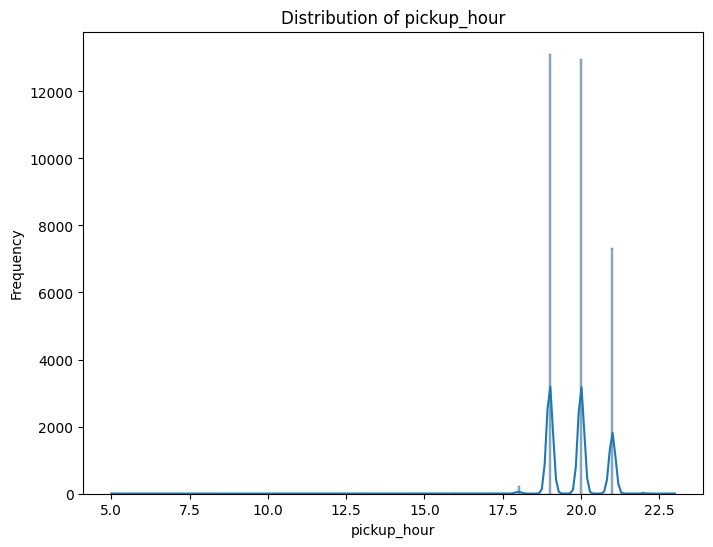

Statistics for numerical variable: trip_duration
Mean: 0.28987904596006087
Median: 0.19277777777777777
Minimum: 0.0
Maximum: 23.98611111111111



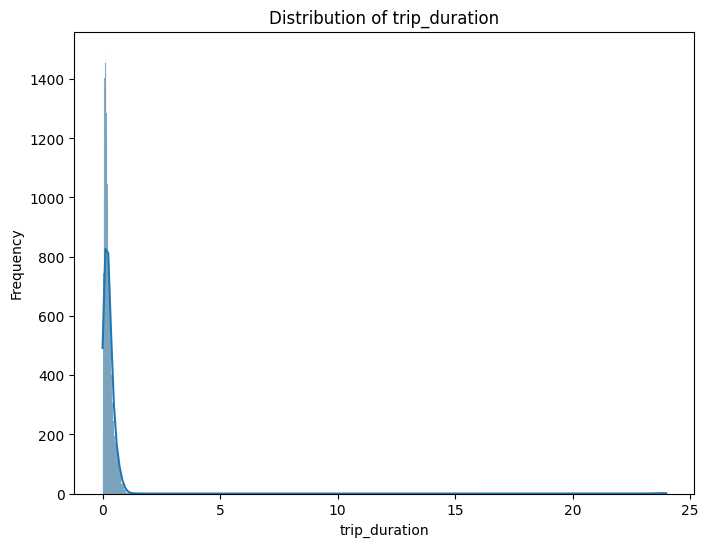

In [ ]:
# Iterate through DataFrame columns to show distribution
for column in df.columns:
    column_dtype = df[column].dtype

    # Check if the column dtype is object (categorical)
    if column_dtype == 'object':
        print("Distribution of categorical variable:", column)
        print(df[column].value_counts())
        print()
    else:
        # Print statistics for numerical variable
        print("Statistics for numerical variable:", column)
        print("Mean:", df[column].mean())
        print("Median:", df[column].median())
        print("Minimum:", df[column].min())
        print("Maximum:", df[column].max())
        print()

        # Create histogram (distplot) for numerical variable
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=column, kde=True)
        plt.title("Distribution of " + column)
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

The statistical summaries show the distribution of the numerical features while showing the numerical measures such as their count,mean, minimum values, maximum values as well as the quartiles and standard deviation.


There are 2 vendors, with Vendor 2 having more amount of trips.


There are many pick-ups at night, with the highest number being at 9pm.


There are many drop-offs in the morning, with the highest taking place at 6 in the morning.






## Bivariate Analysis

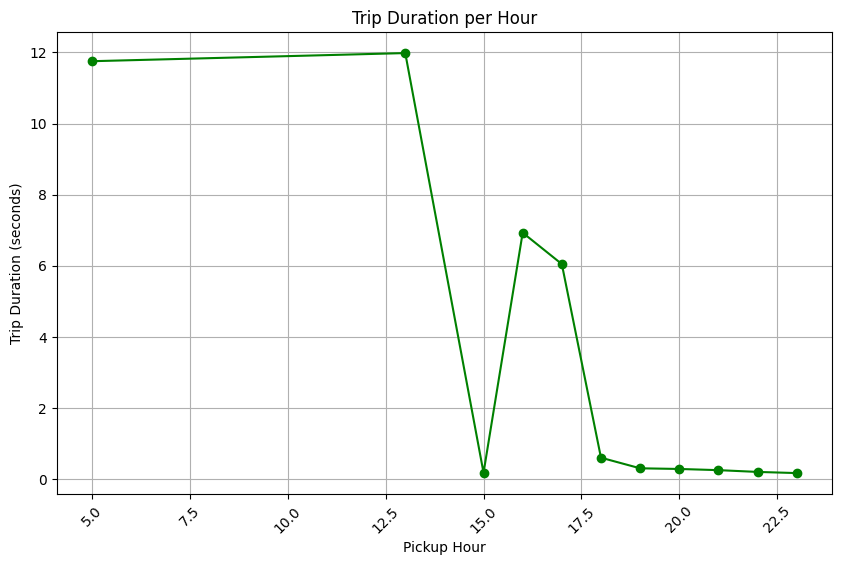

In [ ]:
# Number of trips per hour
plt.figure(figsize=(10, 6))
group1 = df.groupby('pickup_hour').trip_duration.mean()
group1.plot(kind='line', marker='o', color='green')
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Pickup Hour')
plt.title('Trip Duration per Hour')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Trip duration is highest at around 5am and lowest at 3pm, probably because of little traffic at the time.

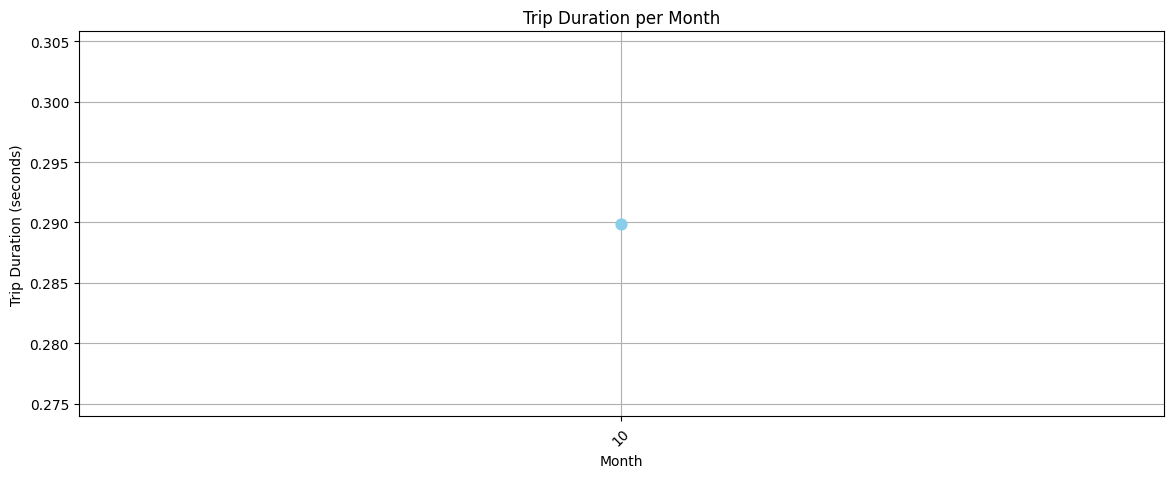

In [ ]:
# Trip duration per month
plt.figure(figsize=(14, 5))
group3 = df.groupby('month').trip_duration.mean().reset_index()  # Reset index to access month as a column
sns.pointplot(x='month', y='trip_duration', data=group3, color='skyblue')
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Month')
plt.title('Trip Duration per Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


October had the highest number of trips

## Multivariate Analysis

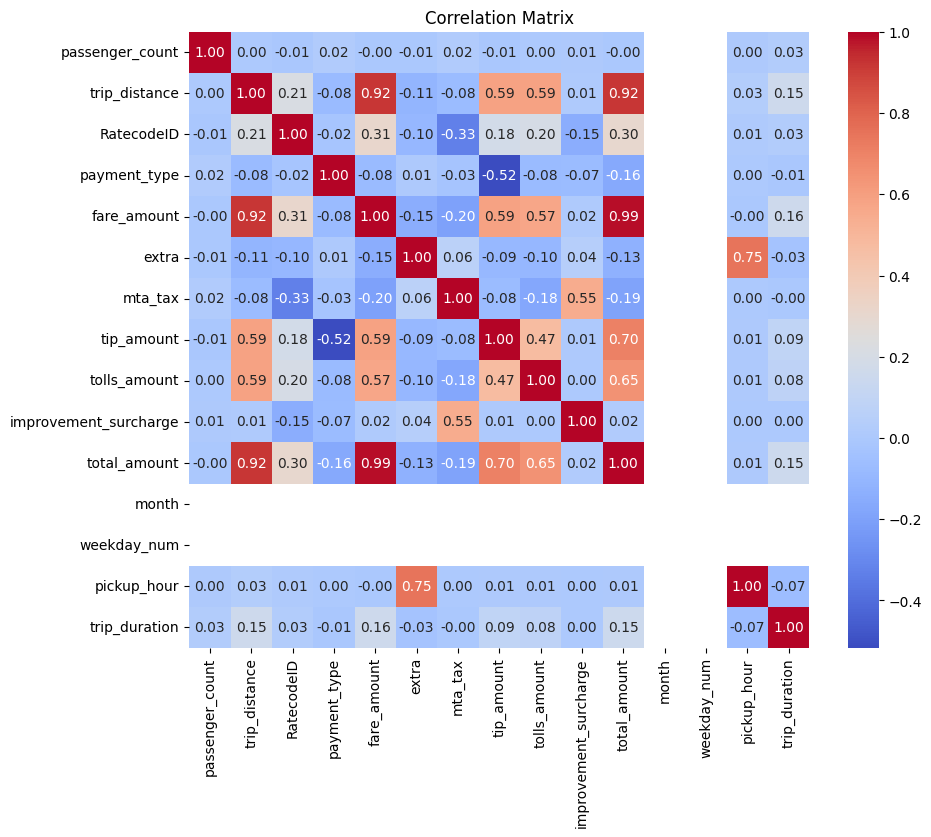

In [ ]:
# Correlation
numerical_df = df.select_dtypes(include='number')
# Calculate correlation
correlation_matrix = numerical_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Correlation values measure how the variables influence one another. For instance, trip distance and fare amount have a strong positive correlation, implying that fare amount increases by 92% with an increase in the trip distance

Total amount and fare amount have a strong positive correlation, implying that fare amount increases by 99% with an increase in the total amount


# Model Development

Regression models will be used because the target variable is numerical and continuous. Various models are chosen so that the best model in terms of accuracy and processing time can be selected from them. Random forest model will be used because it is robust to outliers, less-prone to overfitting and can capture non-linear relationships i the data. Adaboost model will be used because it is a strong learner and captures non-linear relationships.
XGBoost will be used because it can handle large datasets. Linear regression will also be used because it is simple and interpretable.

## Predicting Trip Duration

In [ ]:
# Specifying the dependent and independent variables

X = df.drop(columns=['trip_duration', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'])
y = df['trip_duration']

In [ ]:
# Preprocess and transform features
# Define preprocessing steps for numerical and categorical features
# Select categorical, numerical, and datetime columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(exclude='object').columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps, excluding datetime columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'  # Ensure non-transformed columns are passed through
)


# Preprocess and transform the features
X_preprocessed = preprocessor.fit_transform(X)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


In [ ]:
# Define models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'LinearRegression': LinearRegression(),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define accuracy tolerance level as a percentage of true target values
accuracy_tolerance = 0.1  # 10%

# Initialize lists to store results
results = []

In [ ]:
# Train and evaluate each model
for model_name, model in models.items():
    start_time = time.time()  # Start time
    model.fit(X_train, y_train)  # Train the model
    end_time = time.time()  # End time
    run_time = end_time - start_time  # Calculate run time

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate Root Mean Squared Error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)

    # Calculate accuracy
    absolute_errors = np.abs(y_test - y_pred)
    accuracy = np.mean(absolute_errors <= accuracy_tolerance * y_test) * 100  # Calculate accuracy as a percentage

    # Append results to the list
    results.append({
        'Model': model_name,
        'MAE': mae,
        'RMSE': rmse,
        'R2 Score': r2,
        'Accuracy': accuracy,
        'Run Time (s)': run_time
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


              Model       MAE      RMSE  R2 Score   Accuracy  Run Time (s)
0      RandomForest  0.103405  1.086830 -0.171171  71.451900     11.270434
1  LinearRegression  0.149994  0.989645  0.028919  13.019596      0.031537
2          AdaBoost  0.113857  1.011062 -0.013567  22.387173      0.237115
3           XGBoost  0.136436  1.120730 -0.245371  39.533848      0.274064


From the observed results, RandomForest performs better than all the models but takes the highest processing speed.


### Feature Importance Analysis

In [ ]:
# Calculate feature importance
feature_importance_list = []
max_features = max(len(X.columns) for _, model in models.items())  # Get the maximum number of features
for model_name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importance = np.abs(model.coef_)
    else:
        importance = None

    if importance is not None:
        # Ensure that the importance array has the maximum number of features
        if len(importance) < max_features:
            importance = np.pad(importance, (0, max_features - len(importance)), mode='constant')

        feature_importance_list.append({
            'Model': model_name,
            'Feature Importance': importance
        })

# Convert feature importance to DataFrame
feature_importance_df = pd.DataFrame(feature_importance_list)

# Display the feature importance
for idx, row in feature_importance_df.iterrows():
    feature_length = min(len(row['Feature Importance']), len(X.columns))
    print(f"\nFeature Importance for {row['Model']}:")
    print(pd.DataFrame({'Feature': X.columns[:feature_length], 'Importance': row['Feature Importance'][:feature_length]}))



Feature Importance for RandomForest:
                  Feature  Importance
0         passenger_count    0.074173
1           trip_distance    0.425165
2              RatecodeID    0.000461
3      store_and_fwd_flag    0.023550
4            payment_type    0.126982
5             fare_amount    0.019838
6                   extra    0.000011
7                 mta_tax    0.071757
8              tip_amount    0.001717
9            tolls_amount    0.000107
10  improvement_surcharge    0.123572
11           total_amount    0.000000
12                  month    0.000000
13                weekday    0.132565
14            weekday_num    0.000001
15            pickup_hour    0.000100

Feature Importance for LinearRegression:
                  Feature    Importance
0         passenger_count  2.516413e-02
1           trip_distance  5.450795e-02
2              RatecodeID  2.507259e-03
3      store_and_fwd_flag  5.900705e-03
4            payment_type  8.926080e-02
5             fare_amount  1.10240

Various models give different feature importances. Analyzing the features using RandomForest shows trip distance as the highest feature, while adaboost shows weekday. Since RandomForest gives the highest accuracy, then we can conclude that tip distance is the best feature to  determine trip duration

## Predicting Total Amount

In [ ]:
X = df.drop(columns=['PULocationID', 'VendorID', 'DOLocationID','total_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'])
y = df['total_amount']

In [ ]:
# Preprocess and transform features
# Define preprocessing steps for numerical and categorical features
# Select categorical, numerical, and datetime columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(exclude='object').columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps, excluding datetime columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'  # Ensure non-transformed columns are passed through
)


# Preprocess and transform the features
X_preprocessed = preprocessor.fit_transform(X)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


In [ ]:
# Define models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'LinearRegression': LinearRegression(),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Initialize lists to store results
results = []

In [ ]:
# Train and evaluate each model
for model_name, model in models.items():
    start_time = time.time()  # Start time
    model.fit(X_train, y_train)  # Train the model
    end_time = time.time()  # End time
    run_time = end_time - start_time  # Calculate run time

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate Root Mean Squared Error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)

    # Calculate accuracy
    absolute_errors = np.abs(y_test - y_pred)
    accuracy = np.mean(absolute_errors <= accuracy_tolerance * y_test) * 100  # Calculate accuracy as a percentage

    # Append results to the list
    results.append({
        'Model': model_name,
        'MAE': mae,
        'RMSE': rmse,
        'R2 Score': r2,
        'Accuracy': accuracy,
        'Run Time (s)': run_time
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


              Model       MAE      RMSE  R2 Score   Accuracy  Run Time (s)
0      RandomForest  0.072396  0.780398  0.997356  99.717933      7.267383
1  LinearRegression  0.001736  0.033688  0.999995  99.970309      0.030936
2          AdaBoost  3.492280  4.509995  0.911690  29.216152      1.691989
3           XGBoost  0.094935  0.585226  0.998513  99.836698      1.280514


Linear regression works best with the highest score value, least run time and least error.

### Feature Analysis

In [ ]:
# Calculate feature importance
feature_importance_list = []
max_features = max(len(X.columns) for _, model in models.items())  # Get the maximum number of features
for model_name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importance = np.abs(model.coef_)
    else:
        importance = None

    if importance is not None:
        # Ensure that the importance array has the maximum number of features
        if len(importance) < max_features:
            importance = np.pad(importance, (0, max_features - len(importance)), mode='constant')

        feature_importance_list.append({
            'Model': model_name,
            'Feature Importance': importance
        })

# Convert feature importance to DataFrame
feature_importance_df = pd.DataFrame(feature_importance_list)

# Display the feature importance
for idx, row in feature_importance_df.iterrows():
    feature_length = min(len(row['Feature Importance']), len(X.columns))
    print(f"\nFeature Importance for {row['Model']}:")
    print(pd.DataFrame({'Feature': X.columns[:feature_length], 'Importance': row['Feature Importance'][:feature_length]}))


Feature Importance for RandomForest:
                  Feature    Importance
0         passenger_count  6.233142e-05
1           trip_distance  7.560547e-02
2              RatecodeID  3.566567e-05
3      store_and_fwd_flag  5.301086e-05
4            payment_type  8.912009e-01
5             fare_amount  1.485893e-04
6                   extra  1.601084e-04
7                 mta_tax  2.666213e-02
8              tip_amount  5.565604e-03
9            tolls_amount  4.048349e-05
10  improvement_surcharge  0.000000e+00
11                  month  0.000000e+00
12                weekday  1.100603e-04
13            weekday_num  3.548203e-04
14            pickup_hour  3.073879e-07
15          trip_duration  4.894043e-07

Feature Importance for LinearRegression:
                  Feature    Importance
0         passenger_count  6.833671e-04
1           trip_distance  1.200808e-03
2              RatecodeID  1.355692e-03
3      store_and_fwd_flag  4.382735e-04
4            payment_type  1.320409e+01


Analyzing using the best performing model, payment type is the best feature that determines the total amount.

# Conclusion

Linear regression and RandomForest algorithms perform better than other models in predicting total amount and trip duration respectively.

Payment type significantly influences total amount while trip distance influences trip duration.


Insights obtained can be used in coming up with data-driven strategies, guiding decision-making.